In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [63]:
df = pd.read_csv("Titanic-Dataset.csv")  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
print(df.shape)

(891, 12)


In [65]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [66]:
print(df.describe(include='all'))

        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.0

In [67]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [68]:
#handling age using median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [69]:
#dropping cabin as most of its values are missing
df.drop(columns=['Cabin'], inplace=True)

In [70]:
#handling embarked using mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [71]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [72]:
#identifying categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


In [73]:
#label encoding 'sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [74]:
#one-hot encoding 'embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [75]:
#handling 'name'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                   'Don', 'Dr', 'Major', 'Rev', 'Sir',
                                   'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})

df = pd.get_dummies(df, columns=['Title'], drop_first=True)


In [76]:
df.drop(columns=['Name'], inplace=True)


In [77]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,False,True,False,True,False,False
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,False,False,False,False,True,False
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,False,True,True,False,False,False
3,4,1,1,1,35.0,1,0,113803,53.1000,False,True,False,False,True,False
4,5,0,3,0,35.0,0,0,373450,8.0500,False,True,False,True,False,False


In [78]:
#scaling age and fare
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [79]:
df.drop(columns=['Ticket'], inplace=True)

In [80]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,0,-0.565736,1,0,-0.502445,False,True,False,True,False,False
1,2,1,1,1,0.663861,1,0,0.786845,False,False,False,False,True,False
2,3,1,3,1,-0.258337,0,0,-0.488854,False,True,True,False,False,False
3,4,1,1,1,0.433312,1,0,0.420730,False,True,False,False,True,False
4,5,0,3,0,0.433312,0,0,-0.486337,False,True,False,True,False,False


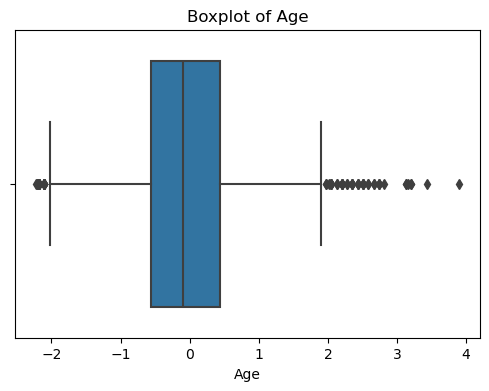

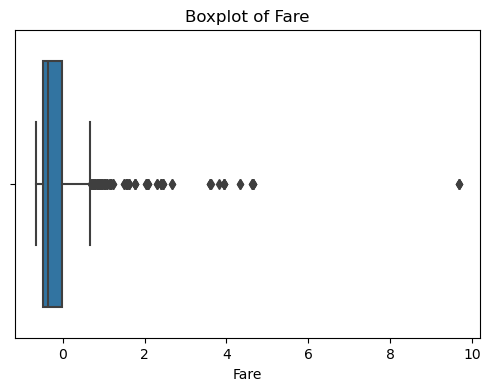

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Age
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

# Boxplot for Fare
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()


In [83]:
# removing outliers in age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
df = df[(df['Age'] >= Q1_age - 1.5 * IQR_age) & (df['Age'] <= Q3_age + 1.5 * IQR_age)]

# removing outliers in fare
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
df = df[(df['Fare'] >= Q1_fare - 1.5 * IQR_fare) & (df['Fare'] <= Q3_fare + 1.5 * IQR_fare)]


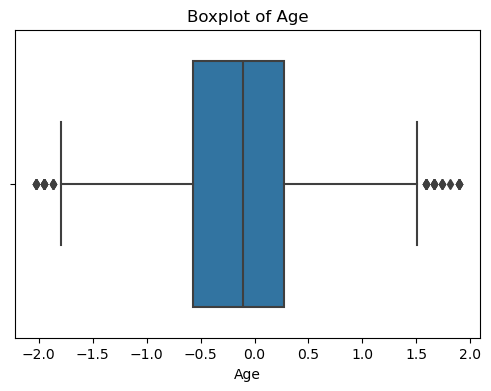

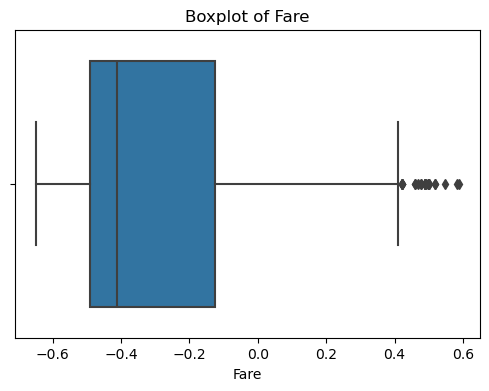

In [84]:

# Boxplot for Age
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

# Boxplot for Fare
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [85]:
df.to_csv("cleaned_titanic.csv", index=False)
